### Auto MPG 데이터셋을 사용하여 1970년대 후반과 1980년대 초반의 자동차 연비를 예측하는 모델을 만듭니다. 이 정보에는 실린더 수, 배기량, 마력(horsepower), 공차 중량 같은 속성이 포함됩니다.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# 구글 드라이브 마운트


In [2]:
# Working Directory 설정
import os

In [3]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/ml_plus/data')

파일은 auto-mpg.csv 입니다.

In [4]:
df = pd.read_csv('auto-mpg.csv')

In [5]:
df

,mpg,cyl,displ,hp,weight,accel,yr,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [6]:
# 1  빈데이터 확인
df.isna().sum()

mpg       0
cyl       0
displ     0
hp        0
weight    0
accel     0
yr        0
origin    0
name      0
dtype: int64

In [8]:
# 2 빈 데이터 삭제
df.dropna(inplace = True)

In [ ]:
# 3. X , y 셋팅

In [9]:
df.head(1)

,mpg,cyl,displ,hp,weight,accel,yr,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu


In [11]:
X = df.loc[ : , 'cyl' :  'origin']

In [12]:
y = df['mpg']

In [ ]:
# 4. 카테고리컬 데이터 처리 
# Origin 컬럼은 다음과 같다. (1. American, 2. European,3. Japanese).

In [13]:
X['origin'].nunique()

3

In [14]:
from sklearn.preprocessing import OneHotEncoder

In [15]:
from sklearn.compose import ColumnTransformer

In [16]:
X.head(1)

,cyl,displ,hp,weight,accel,yr,origin
0,8,307.0,130,3504,12.0,70,1


In [17]:
ct = ColumnTransformer([('encoder', OneHotEncoder(), [6])], remainder='passthrough')

In [20]:
X = ct.fit_transform(X.values)

In [ ]:
# 5. X 만 피처 스케일링 하시오 (차트 확인을 위해, y는 하지 않습니다.)

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
scaler_X = MinMaxScaler()

In [25]:
X = scaler_X.fit_transform(X)

In [ ]:
# 5. 트레인 / 테스트용 셋으로 분리

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7 )

In [ ]:
# 딥러닝 모델링

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [29]:
X_train.shape

(313, 9)

In [36]:
def build_model():
  model = Sequential()
  model.add(  Dense(64 , 'relu', input_shape= (9,) )  )
  model.add( Dense(64, 'relu') )
  model.add( Dense(1, 'linear'))
  model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.001) ,
                loss= 'mse', metrics=['mse', 'mae'])
  return model

In [41]:
model = build_model()

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                640       
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [42]:
epoch_history = model.fit(X_train, y_train, epochs = 200, validation_split= 0.2 )

Epoch 1/200
8/8 [==============================] - 1s 30ms/step - loss: 610.5374 - mse: 610.5374 - mae: 23.4399 - val_loss: 555.8674 - val_mse: 555.8674 - val_mae: 22.1386
Epoch 2/200
8/8 [==============================] - 0s 6ms/step - loss: 587.2214 - mse: 587.2214 - mae: 22.9077 - val_loss: 532.2105 - val_mse: 532.2105 - val_mae: 21.5705
Epoch 3/200
8/8 [==============================] - 0s 7ms/step - loss: 561.8102 - mse: 561.8102 - mae: 22.3228 - val_loss: 504.5652 - val_mse: 504.5652 - val_mae: 20.8901
Epoch 4/200
8/8 [==============================] - 0s 6ms/step - loss: 531.5095 - mse: 531.5095 - mae: 21.5949 - val_loss: 470.3656 - val_mse: 470.3656 - val_mae: 20.0139
Epoch 5/200
8/8 [==============================] - 0s 5ms/step - loss: 492.5634 - mse: 492.5634 - mae: 20.6467 - val_loss: 427.5130 - val_mse: 427.5130 - val_mae: 18.8520
Epoch 6/200
8/8 [==============================] - 0s 5ms/step - loss: 444.5004 - mse: 444.5004 - mae: 19.3795 - val_loss: 374.8641 - val_mse: 3

In [ ]:
######## validation ########
# 밸리데이션이란, 에포크가 한번 끝날때 마다, 학습에 사용하지 않은 데이터로
# 시험을 보는 것을 말한다. 

# 테스트란, 인공지능이 완전이 학습이 다 끝난 상태에서 평가하는것을 테스트라고 하고,
# 밸리데이션은, 학습 중에, 에포크 끝날때 마다 평가하는 것을 말한다.

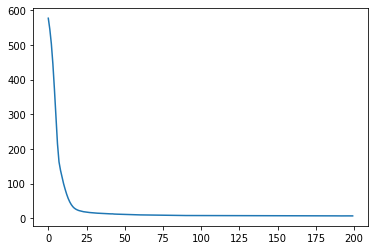

In [40]:
plt.plot(epoch_history.history['loss'])
plt.show()

In [ ]:
## epoch_history 객체에 저장된 통계치를 사용해 모델의 훈련 과정을 시각화!

In [58]:
import matplotlib.pyplot as plt
def plot_history(history) :
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize = (8, 12))

  plt.subplot(2, 1, 1)
  plt.xlabel('Eopoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'], label = 'Train Error')
  plt.plot(hist['epoch'], hist['val_mae'], label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.subplot(2, 1, 2)
  plt.xlabel('Eopoch')
  plt.ylabel('Mean Squared Error [MPG]')
  plt.plot(hist['epoch'], hist['mse'], label = 'Train Error')
  plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()

  plt.show()

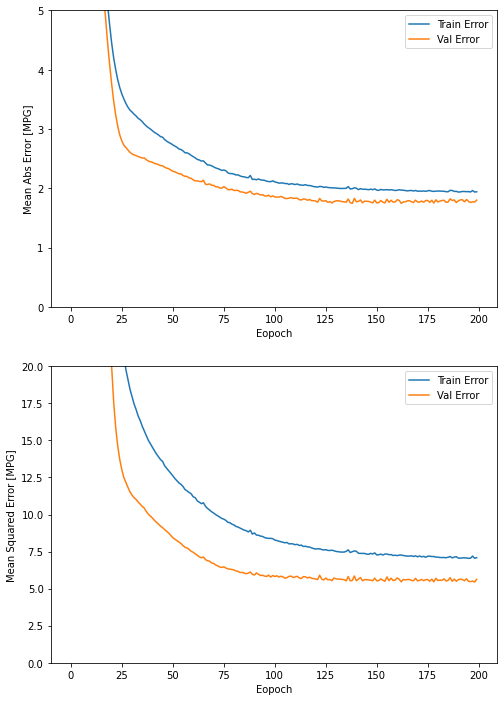

In [46]:
plot_history(epoch_history)

이 그래프를 보면 수 백번 에포크를 진행한 이후에는 모델이 거의 향상되지 않는 것 같습니다. model.fit 메서드를 수정하여 검증 점수가 향상되지 않으면 자동으로 훈련을 멈추도록 만들어 보죠. 에포크마다 훈련 상태를 점검하기 위해 EarlyStopping 콜백(callback)을 사용하겠습니다. 지정된 에포크 횟수 동안 성능 향상이 없으면 자동으로 훈련이 멈춥니다.

이 콜백에 대해 더 자세한 내용은 여기를 참고하세요.[링크 텍스트](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping)

In [54]:
model = build_model()

In [ ]:
# callback 이란,  내가 만든 함수를, 프레임워크가 실행시켜주는 것!

In [55]:
# patience 를 10으로 설정하면,, 10번의 에포크동안 성능향상이 없으면 학습을 멈추라는뜻.
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience= 10)

In [56]:
epoch_history = model.fit(X_train, y_train, epochs=1000000, validation_split=0.2, callbacks= [early_stop] )

Epoch 1/1000000
8/8 [==============================] - 1s 25ms/step - loss: 614.7022 - mse: 614.7022 - mae: 23.5524 - val_loss: 561.3541 - val_mse: 561.3541 - val_mae: 22.2877
Epoch 2/1000000
8/8 [==============================] - 0s 8ms/step - loss: 592.7796 - mse: 592.7796 - mae: 23.0619 - val_loss: 538.8699 - val_mse: 538.8699 - val_mae: 21.7621
Epoch 3/1000000
8/8 [==============================] - 0s 5ms/step - loss: 569.7996 - mse: 569.7996 - mae: 22.5353 - val_loss: 514.6371 - val_mse: 514.6371 - val_mae: 21.1740
Epoch 4/1000000
8/8 [==============================] - 0s 6ms/step - loss: 543.7545 - mse: 543.7545 - mae: 21.9249 - val_loss: 486.3629 - val_mse: 486.3629 - val_mae: 20.4665
Epoch 5/1000000
8/8 [==============================] - 0s 8ms/step - loss: 511.8012 - mse: 511.8012 - mae: 21.1606 - val_loss: 450.5685 - val_mse: 450.5685 - val_mae: 19.5290
Epoch 6/1000000
8/8 [==============================] - 0s 5ms/step - loss: 471.1087 - mse: 471.1087 - mae: 20.1222 - val_los

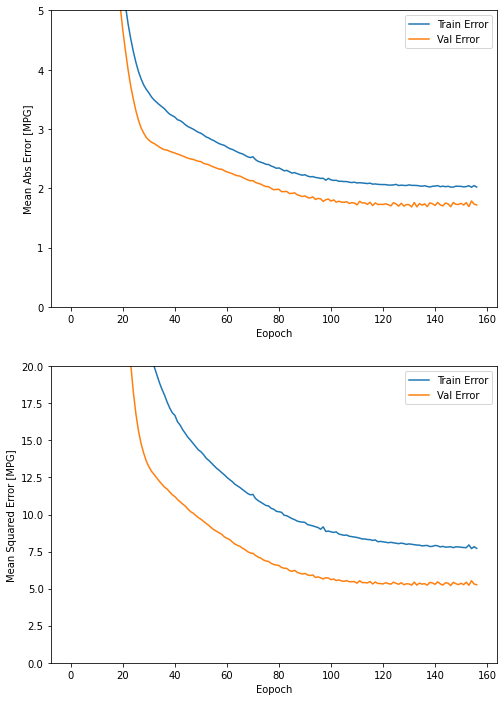

In [57]:
plot_history( epoch_history )